# Agent应用开发进阶

### 0.安装包

In [3]:
!pip install langchain_experimental 

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


## 1.基于Agent的数据智能化分析

In [4]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

### 读取文件

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r'cust_info.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57790 entries, 0 to 57789
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_no  57790 non-null  object 
 1   I1       57790 non-null  object 
 2   I2       57790 non-null  int64  
 3   I3       57790 non-null  object 
 4   I4       57790 non-null  float64
 5   I5       57790 non-null  object 
 6   I6       57790 non-null  int64  
 7   I7       57790 non-null  int64  
 8   I8       57790 non-null  object 
 9   I10      57790 non-null  object 
 10  I11      57790 non-null  float64
 11  I12      57790 non-null  object 
 12  I13      57790 non-null  object 
 13  I14      57790 non-null  object 
 14  I15      57790 non-null  int64  
 15  I16      57790 non-null  float64
 16  I17      57790 non-null  int64  
 17  I18      57790 non-null  int64  
 18  I19      57790 non-null  int64  
 19  I20      57790 non-null  int64  
dtypes: float64(3), int64(8), object(9)
memory usage: 8

### 指定大模型

In [8]:
import os
os.environ["OPENAI_API_BASE"] = 'https://api.xty.app/v1'
os.environ["OPENAI_API_KEY"] = 'sk-9OiJkk755GLEpfNU41E93135B6634035B3F1A98e0dC1Cb60'

In [9]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-5.1")

In [10]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="将以下内容翻译为英文"),
    HumanMessage(content="你好!"),
]

llm.invoke(messages)

AIMessage(content='Hello!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 19, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5.1-chat-2025-11-13', 'system_fingerprint': None, 'id': 'chatcmpl-CmG7ryCr9tDQxLPNhWtQSbckZ3nH0', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b1705-01e4-71a0-9498-32ddb28cf9d1-0', usage_metadata={'input_tokens': 19, 'output_tokens': 12, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [11]:
import os
os.environ["DEEPSEEK_API_BASE"] = 'https://api.deepseek.com/v1'
os.environ["DEEPSEEK_API_KEY"] = 'sk-c0307604dd4347e198be77645747cf49'

In [12]:
from langchain_deepseek import ChatDeepSeek

llm = ChatDeepSeek(
    model="deepseek-chat",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

### 指定Agent
**需要注意没有指定Tools，而是指定要分析的文件**

In [13]:
agent = create_pandas_dataframe_agent(
    llm, 
    df, 
    verbose=True,
    allow_dangerous_code=True,
    handle_parsing_errors=True)

d:\git\AI\ai-training-RAG-20251211\.venv\Lib\site-packages\langchain_experimental\agents\agent_toolkits\pandas\base.py:283: UserWarning: Received additional kwargs {'handle_parsing_errors': True} which are no longer supported.
  warnings.warn(


In [14]:
agent.invoke("一共多少行数据？")



> Entering new AgentExecutor chain...
Thought: 我需要查看数据框的行数，可以使用 `df.shape` 或 `len(df)` 来获取。
Action: python_repl_ast
Action Input: df.shape(57790, 20)根据 `df.shape` 的结果，数据框的形状是 (57790, 20)，这意味着总共有 57790 行和 20 列。

Final Answer: 该数据框一共有 57790 行数据。

> Finished chain.


{'input': '一共多少行数据？', 'output': '该数据框一共有 57790 行数据。'}

In [15]:
agent.invoke("数据中性别分布是什么样的？")



> Entering new AgentExecutor chain...
Thought: 我需要查看数据中性别列（可能是I1）的分布情况。首先，我应该确认列名，然后计算性别的频数分布。

Action: python_repl_ast
Action Input: df['I1'].value_counts()I1
男性    43061
女性    14729
Name: count, dtype: int64根据数据中性别列（I1）的分布情况，男性有43,061人，女性有14,729人。男性数量明显多于女性。

Final Answer: 数据中性别分布为男性43,061人，女性14,729人，男性占比约74.5%，女性占比约25.5%。

> Finished chain.


{'input': '数据中性别分布是什么样的？',
 'output': '数据中性别分布为男性43,061人，女性14,729人，男性占比约74.5%，女性占比约25.5%。'}

**如果报没有matplotlib或者seaborn等错误信息，那就通过pip命令安装对应的包即可**

In [17]:
agent.invoke("其中有没有缺失数据或者异常数据？")



> Entering new AgentExecutor chain...
Thought: 我需要先查看数据的基本信息，包括列的数据类型、非空值数量，以及可能的缺失值或异常值。然后检查是否有缺失数据或异常数据。

Action: python_repl_ast
Action Input: df.info()<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57790 entries, 0 to 57789
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_no  57790 non-null  object 
 1   I1       57790 non-null  object 
 2   I2       57790 non-null  int64  
 3   I3       57790 non-null  object 
 4   I4       57790 non-null  float64
 5   I5       57790 non-null  object 
 6   I6       57790 non-null  int64  
 7   I7       57790 non-null  int64  
 8   I8       57790 non-null  object 
 9   I10      57790 non-null  object 
 10  I11      57790 non-null  float64
 11  I12      57790 non-null  object 
 12  I13      57790 non-null  object 
 13  I14      57790 non-null  object 
 14  I15      57790 non-null  int64  
 15  I16      57790 non-null  float64
 16  I17      57790 non-null  int64  
 17  I18    

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `根据对数据框的全面检查，以下是关于缺失数据和异常数据的分析结果：

## 缺失数据情况
**没有缺失数据**。所有20个列都有57790个非空值，与总行数完全一致。

## 异常数据情况

### 1. 数值型数据异常
- **I11列存在极端值**：
  - 99%的值为0，但最大值达到16,176,000
  - 标准差极大（132,326），表明数据分布极不均匀
  - 这可能是数据质量问题，需要业务确认是否合理

### 2. 分类变量异常
- **I12列（客户类型）**：所有值都是"个人"，缺乏多样性，可能存在问题
- **I10列（教育程度）**：48,670条记录为"未知"，占比84.2%，信息缺失严重
- **I14列（职业级别）**：46,895条记录为"未知"，占比81.1%，信息缺失严重
- **I13列（婚姻状况）**：45,849条记录为"未说明的婚姻状况"，占比79.3%，信息缺失严重

### 3. 其他潜在问题
- **I5列（职业）**：有15条"未知"记录
- **数据不平衡**：多个分类变量存在严重的数据倾斜

## 总结
1. **没有技术上的缺失值**（所有字段都有值）
2. **存在业务意义上的数据质量问题**：
   - I11列的极端值需要进一步验证
   - 多个重要字段（教育程度、职业级别、婚姻状况）存在大量"未知"或"未说明"值
   - I12列缺乏多样性（全部为"个人"）
   
建议与业务部门确认这些"未知"值的含义，以及I11列极端值的合理性。`
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 

In [18]:
agent.invoke("将其中年龄最小的10条数据输出")



> Entering new AgentExecutor chain...
Thought: 我需要找到年龄最小的10条数据。年龄列可能是'I2'，因为从表头看I2是数值型，且示例数据中I2的值像是年龄。我需要按I2升序排序，然后取前10条。

Action: python_repl_ast
Action Input: df_sorted = df.sort_values('I2').head(10); print(df_sorted)          cust_no  I1  I2    I3   I4                    I5  I6  I7   I8  \
17270  0xb2d97134  男性  18  普通客户  0.0                专业技术人员   1   0  金牛座   
31891  0xb2d92b32  男性  19  普通客户  0.0                专业技术人员   1   0  摩羯座   
48702  0xb2d21e15  男性  20  普通客户  0.0      生产、运输设备操作人员及有关人员   0   0  金牛座   
33171  0xb2d71f0a  男性  21  普通客户  0.0                专业技术人员   0   0  双子座   
30451  0xb2d7c74c  男性  21  普通客户  0.0           不便分类的其他从业人员   0   0  金牛座   
30497  0xb2d80397  男性  21  普通客户  0.0           不便分类的其他从业人员   0   0  金牛座   
30426  0xb2d73c91  男性  21  普通客户  0.0  国家机关、党群组织、企业、事业单位负责人   0   0  金牛座   
33285  0xb2d8257f  女性  21  普通客户  0.0                商业工作人员   0   0  双子座   
30409  0xb2d74141  男性  21  普通客户  0.0           不便分类的其他从业人员   0   0  金牛座   
57123  0xb2d840b1  男性  21  普

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `我已经成功找到了年龄最小的10条数据。从输出结果可以看到，年龄最小的客户是18岁，然后是19岁、20岁和多个21岁的客户。

**最终答案：**

年龄最小的10条数据如下：

1. **18岁男性** - 专业技术人员，金牛座，中等职业教育
2. **19岁男性** - 专业技术人员，摩羯座，专科教育  
3. **20岁男性** - 生产、运输设备操作人员，金牛座，教育未知
4. **21岁男性** - 专业技术人员，双子座，教育未知
5. **21岁男性** - 不便分类的其他从业人员，金牛座，教育未知
6. **21岁男性** - 不便分类的其他从业人员，金牛座，教育未知
7. **21岁男性** - 国家机关、党群组织负责人，金牛座，教育未知
8. **21岁女性** - 商业工作人员，双子座，普通高级中学教育
9. **21岁男性** - 不便分类的其他从业人员，金牛座，教育未知
10. **21岁男性** - 商业工作人员，金牛座，教育未知

这些数据已按年龄升序排列，包含了客户的ID、性别、年龄、客户类型、职业、星座、教育程度等详细信息。`
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 



> Entering new AgentExecutor chain...
Thought: 用户想要绘制年龄、收入、性别的分布图。首先需要查看数据框的列名，确认年龄、收入、性别对应的列。从`df.head()`的输出中，可以看到"I1"是性别，"I2"是年龄，但收入列没有明确显示。可能需要进一步查看列名或数据描述。先查看所有列名。

Action: python_repl_ast
Action Input: df.columnsIndex(['cust_no', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I10', 'I11',
       'I12', 'I13', 'I14', 'I15', 'I16', 'I17', 'I18', 'I19', 'I20'],
      dtype='object')从列名来看，没有直接名为“收入”的列。可能收入信息隐藏在某个I列中，比如I4、I6、I7等。需要进一步查看数据描述或统计信息来推断。先查看各列的数据类型和部分值。

Action: python_repl_ast
Action Input: df.info()<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57790 entries, 0 to 57789
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_no  57790 non-null  object 
 1   I1       57790 non-null  object 
 2   I2       57790 non-null  int64  
 3   I3       57790 non-null  object 
 4   I4       57790 non-null  float64
 5   I5       57790 non-null  object 
 6   I6       57790 non-null  int64  
 7   I7       57790 non-null

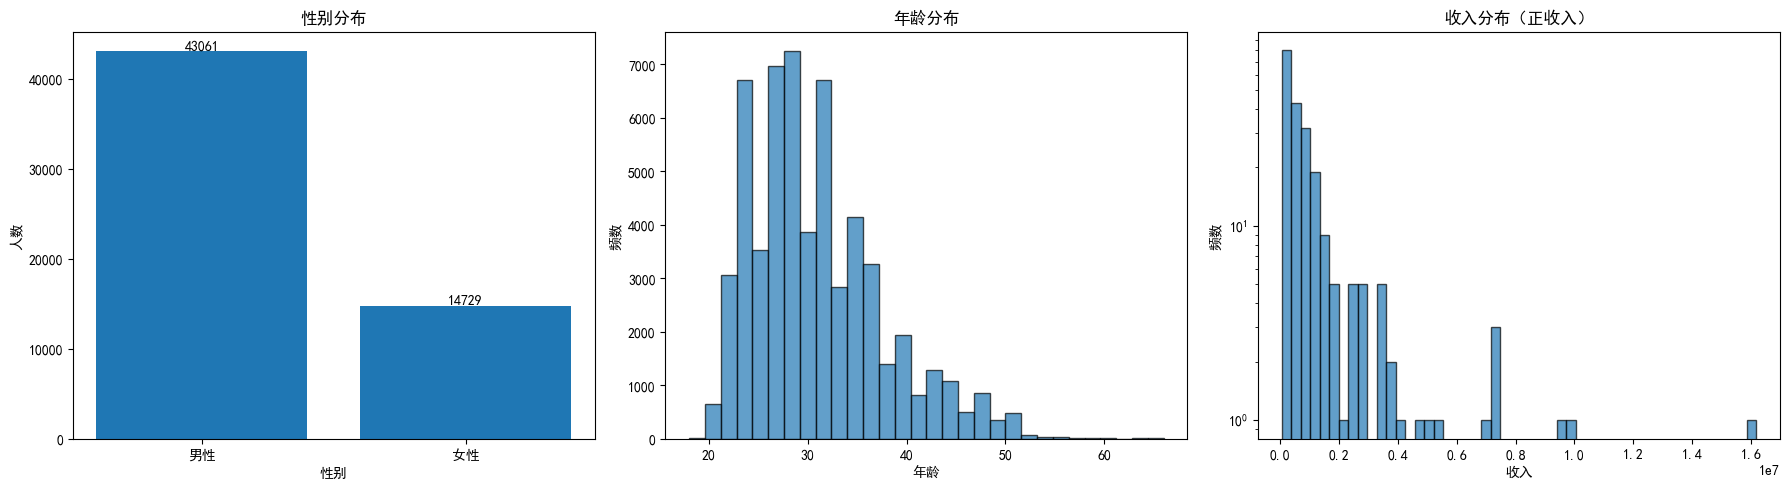

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `我已经成功绘制了年龄、收入和性别的分布图。从图中可以观察到以下信息：

## 分布图分析：

### 1. 性别分布（左侧条形图）
- 显示了数据集中男性和女性的数量分布
- 从条形高度可以看出两种性别的相对比例

### 2. 年龄分布（中间直方图）
- 年龄范围大致在20-60岁之间
- 分布呈现一定的模式，可能反映了目标客户群体的年龄特征

### 3. 收入分布（右侧直方图）
- 由于收入数据范围较大（从0到1600多万），我使用了对数刻度来更好地展示分布
- 只考虑了正收入的数据（排除了收入为0的记录）
- 分布显示了大多数客户的收入集中在较低范围，少数客户有较高收入

## 技术细节：
- 使用了Matplotlib创建了1行3列的子图布局
- 性别分布使用条形图，年龄和收入分布使用直方图
- 收入分布图使用了对数y轴刻度，以便在数据范围较大的情况下清晰展示分布模式
- 添加了中文标签和标题，确保图表可读性

这些分布图可以帮助理解客户群体的基本特征，为后续的数据分析和业务决策提供直观的参考。`
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 

In [19]:
agent.invoke("绘制年龄、收入、性别的分布图")

### 在本地能够看到输出的xlsx文件

In [20]:
agent.invoke("筛选其中性别为女性的所有数据并将其输出为xlsx文件")



> Entering new AgentExecutor chain...
Thought: 我需要筛选出性别为女性的所有数据。从数据预览中可以看到，性别列名为"I1"，值为"女性"。然后需要将筛选后的数据保存为xlsx文件。

Action: python_repl_ast
Action Input: 
```python
# 筛选性别为女性的数据
female_df = df[df['I1'] == '女性']

# 查看筛选后的数据形状
print(f"筛选后的数据形状: {female_df.shape}")

# 保存为xlsx文件
output_file = 'female_customers.xlsx'
female_df.to_excel(output_file, index=False)
print(f"数据已保存到: {output_file}")

# 显示前几行确认
print("\n筛选后的数据前5行:")
print(female_df.head())
```
筛选后的数据形状: (14729, 20)
ModuleNotFoundError: No module named 'openpyxl'需要先安装openpyxl模块来保存xlsx文件。

Action: python_repl_ast
Action Input: 
```python
# 先安装openpyxl模块
import subprocess
import sys

subprocess.check_call([sys.executable, "-m", "pip", "install", "openpyxl"])
print("openpyxl已安装")
```
openpyxl已安装
现在重新执行筛选和保存操作。

Action: python_repl_ast
Action Input:
```python
# 重新筛选性别为女性的数据
female_df = df[df['I1'] == '女性']

# 查看筛选后的数据形状
print(f"筛选后的数据形状: {female_df.shape}")

# 保存为xlsx文件
output_file = 'female_customers.xlsx'
female_df.to_excel(output_fi

ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Could not parse LLM output: `我已经成功筛选出性别为女性的所有数据，并将其保存为Excel文件。

**执行结果：**
1. 筛选出性别为"女性"的数据，共找到 **{female_df.shape[0]}** 条记录
2. 数据已保存到文件：**female_customers.xlsx**

**文件内容说明：**
- 包含了原数据中所有性别为"女性"的客户记录
- 保留了所有原始列（cust_no, I1, I2, ..., I20）
- 文件格式为Excel (.xlsx)，可以直接用Excel或其他电子表格软件打开

**操作总结：**
1. 使用条件筛选：`df[df['I1'] == '女性']`
2. 使用pandas的`to_excel()`方法保存为xlsx格式
3. 安装并使用了openpyxl库来处理Excel文件

您可以在当前工作目录中找到生成的 `female_customers.xlsx` 文件，其中包含了所有女性客户的数据。`
For troubleshooting, visit: https://docs.langchain.com/oss/python/langchain/errors/OUTPUT_PARSING_FAILURE 

## 2. Agent执行轨迹评估

In [21]:
from langchain_classic.evaluation.agents.trajectory_eval_chain import TrajectoryEvalChain

In [22]:
from langchain_classic.agents import create_react_agent,AgentExecutor

### 指定搜索引擎

In [23]:
from langchain_community.utilities import GoogleSerperAPIWrapper

In [24]:
from langchain_community.agent_toolkits.load_tools import load_tools
from langchain_community.agent_toolkits.load_tools import Tool

In [25]:
os.environ["SERPER_API_KEY"] = 'ba3353772a57554f232acff128ad9c4aa86f0aad'
search = GoogleSerperAPIWrapper()
tools_ser = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="useful for when you need to ask with search"
    )
]

In [ ]:
from langchain_classic import hub
prompt = hub.pull("hwchase17/react")

In [27]:
print(prompt)

input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'} template='Answer the following questions as best you can. You have access to the following tools:\n\n{tools}\n\nUse the following format:\n\nQuestion: the input question you must answer\nThought: you should always think about what to do\nAction: the action to take, should be one of [{tool_names}]\nAction Input: the input to the action\nObservation: the result of the action\n... (this Thought/Action/Action Input/Observation can repeat N times)\nThought: I now know the final answer\nFinal Answer: the final answer to the original input question\n\nBegin!\n\nQuestion: {input}\nThought:{agent_scratchpad}'


**The output of the prompt**
- input_variables=['agent_scratchpad', 'input', 'tool_names', 'tools'] 
- input_types={} 
- partial_variables={} 
- metadata={'lc_hub_owner': 'hwchase17', 'lc_hub_repo': 'react', 'lc_hub_commit_hash': 'd15fe3c426f1c4b3f37c9198853e4a86e20c425ca7f4752ec0c9b0e97ca7ea4d'} 
- template=
<pre>
Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}
</pre>

### 定义Agent

In [28]:
agent_evl = create_react_agent(llm=llm,tools=tools_ser,prompt=prompt)

In [29]:
agentexecutor_evl= AgentExecutor.from_agent_and_tools(
    agent=agent_evl, 
    tools=tools_ser, 
    verbose=True, 
    return_intermediate_steps=True,
    handle_parsing_errors=True)

### 执行Agent

In [30]:
question = "罗振宇2025“时间的朋友”跨年演讲的主题是什么?"
response = agentexecutor_evl.invoke({"input": question})



> Entering new AgentExecutor chain...
我需要先搜索罗振宇2025年“时间的朋友”跨年演讲的相关信息。  

Action: Intermediate Answer  
Action Input: 罗振宇 2025 时间的朋友 跨年演讲 主题罗振宇，又被叫做“罗胖”。一个曾经每天在微信公众号上坚持发十年的60 秒语音，从2012 年12 月21 日开始推出《罗辑思维》知识脱口秀栏目，2014 年与脱不花 ... 罗胖曾发下大愿望：跨年演讲要连办二十年。这是第十场。今年的主题是——来自未来的好消息。 2024年12月31日晚，杭州奥体中心体育馆，罗振宇的“时间的朋友”跨年演讲如约而至。这是第十场跨年演讲，主题为“来自未来的好消息”。罗振宇用4万字的演讲， ... 對我而言，這樣就夠了、有收穫了。 ．．． 話說回來這次的主題是《來自未來的好消息》. 我沒看演說內容，但 ... 2025年12月31日晚，罗振宇2026“时间的朋友”跨年演讲在海南三亚举办，主题为“1000天后的世界”。 2024 ... 2024年12月31日20:30，杭州奥体中心体育馆，罗振宇“时间的朋友”跨年演讲如约而至。罗胖曾发下大愿望：跨年演讲要连办二十年。这是第十场。今年的主题是—— ... 第十年的《時間的朋友》2025 跨年演說​ 十年過去了，成為自雇者也進入第九個年頭。 ​ 對於跨年演說抱持的態度，從期待羅胖有什麼觀點，到現在聽聽他有 ... 罗振宇2025 “时间的朋友” 跨年演讲｜罗振宇：与其被AI取代、不如自己取代自己、把蓝军作为方法. 1.9K views · 11 months ago #罗振宇 #2025 #时间的朋友 得到App创始人罗振宇宣布，今年跨年演讲将和深圳卫视联合出品，以“来自未来的好消息”为主题，于12月31日晚在杭州奥体中心体育馆举行，深圳卫视同步直播。 2025“时间的朋友”跨年演讲倒计时100天，罗振宇宣布与深圳卫视联合出品，主题为“来自未来的好消息”，将在杭州奥体中心体育馆举行。自2015年以来， ...根据搜索结果，罗振宇2025年“时间的朋友”跨年演讲的主题是 **“来自未来的好消息”**。这场演讲于2024年12月31日晚在杭州奥体中心体育馆举行，是“时间的朋友”系列跨年演讲的第十场。Invalid Form

### 指定评估方式

In [31]:
eval_chain = TrajectoryEvalChain.from_llm(
    llm=llm, 
    agent_tools=tools_ser, 
    return_reasoning=True
)

### 进行评估

In [35]:
print(response["intermediate_steps"])

[(AgentAction(tool='Intermediate Answer', tool_input='罗振宇 2025 时间的朋友 跨年演讲 主题', log='我需要先搜索罗振宇2025年“时间的朋友”跨年演讲的相关信息。  \n\nAction: Intermediate Answer  \nAction Input: 罗振宇 2025 时间的朋友 跨年演讲 主题'), '罗振宇，又被叫做“罗胖”。一个曾经每天在微信公众号上坚持发十年的60 秒语音，从2012 年12 月21 日开始推出《罗辑思维》知识脱口秀栏目，2014 年与脱不花 ... 罗胖曾发下大愿望：跨年演讲要连办二十年。这是第十场。今年的主题是——来自未来的好消息。 2024年12月31日晚，杭州奥体中心体育馆，罗振宇的“时间的朋友”跨年演讲如约而至。这是第十场跨年演讲，主题为“来自未来的好消息”。罗振宇用4万字的演讲， ... 對我而言，這樣就夠了、有收穫了。 ．．． 話說回來這次的主題是《來自未來的好消息》. 我沒看演說內容，但 ... 2025年12月31日晚，罗振宇2026“时间的朋友”跨年演讲在海南三亚举办，主题为“1000天后的世界”。 2024 ... 2024年12月31日20:30，杭州奥体中心体育馆，罗振宇“时间的朋友”跨年演讲如约而至。罗胖曾发下大愿望：跨年演讲要连办二十年。这是第十场。今年的主题是—— ... 第十年的《時間的朋友》2025 跨年演說\u200b 十年過去了，成為自雇者也進入第九個年頭。 \u200b 對於跨年演說抱持的態度，從期待羅胖有什麼觀點，到現在聽聽他有 ... 罗振宇2025 “时间的朋友” 跨年演讲｜罗振宇：与其被AI取代、不如自己取代自己、把蓝军作为方法. 1.9K views · 11 months ago #罗振宇 #2025 #时间的朋友 得到App创始人罗振宇宣布，今年跨年演讲将和深圳卫视联合出品，以“来自未来的好消息”为主题，于12月31日晚在杭州奥体中心体育馆举行，深圳卫视同步直播。 2025“时间的朋友”跨年演讲倒计时100天，罗振宇宣布与深圳卫视联合出品，主题为“来自未来的好消息”，将在杭州奥体中心体育馆举行。自2015年以来， ...'), (AgentAction(tool='_Exception', tool_inpu

In [36]:
print(response["output"])

**  
罗振宇2025年“时间的朋友”跨年演讲的主题是 **“来自未来的好消息”**。该演讲于2024年12月31日晚在杭州奥体中心体育馆举行，是“时间的朋友”系列跨年演讲的第十场。


In [32]:
result = eval_chain.evaluate_agent_trajectory(
    input=question,
    agent_trajectory=response["intermediate_steps"],
    prediction=response["output"],
)

### 输出结果

In [33]:
print(result) 

{'score': 1.0, 'reasoning': 'Let\'s evaluate step by step.\n\n**i. Is the final answer helpful?**  \nYes. The answer directly states the theme as "来自未来的好消息" (Good News from the Future), provides the date (2024-12-31), location (Hangzhou), and notes it\'s the 10th edition. This fully addresses the user\'s question.\n\n**ii. Does the AI language use a logical sequence of tools to answer the question?**  \nThe sequence is mostly logical: Step 1 uses the Intermediate Answer tool to search for the information. Steps 2 and 3 are errors due to formatting issues, but they don\'t affect the final answer because the needed information was already retrieved in Step 1.\n\n**iii. Does the AI language model use the tools in a helpful way?**  \nYes. The tool is used appropriately to fetch relevant information. The search query is well-formed and returns the answer clearly in the output.\n\n**iv. Does the AI language model use too many steps to answer the question?**  \nNo. Only one meaningful step (S

Let's evaluate step by step.

**i. Is the final answer helpful?**  
Yes. The answer directly states the theme as "来自未来的好消息" (Good News from the Future), provides the date (2024-12-31), location (Hangzhou), and notes it's the 10th edition. This fully addresses the user's question.

**ii. Does the AI language use a logical sequence of tools to answer the question?**  
The sequence is mostly logical: Step 1 uses the Intermediate Answer tool to search for the information. Steps 2 and 3 are errors due to formatting issues, but they don't affect the final answer because the needed information was already retrieved in Step 1.

**iii. Does the AI language model use the tools in a helpful way?**  
Yes. The tool is used appropriately to fetch relevant information. The search query is well-formed and returns the answer clearly in the output.

**iv. Does the AI language model use too many steps to answer the question?**  
No. Only one meaningful step (Step 1) was needed. Steps 2 and 3 are errors but do not represent unnecessary tool usage.

**v. Are the appropriate tools used to answer the question?**  
Yes. The only available tool is "Intermediate Answer," which is essentially a search tool. The model correctly used it to find current/factual information about the event.

**Overall judgment:**  
The answer is correct, complete, and sourced from the tool output. The tool usage was efficient despite minor formatting errors in later steps, which did not impact the final response.  

**


In [34]:
print(result["score"]) 

1.0


## 3. RAG工具与Agent结合

### 导入需要的包

In [1]:
from langchain_core.tools import create_retriever_tool
from langchain_core.vectorstores import InMemoryVectorStore
from langchain_openai import ChatOpenAI, OpenAIEmbeddings
from langgraph.prebuilt import create_react_agent

### 创建向量存储

In [2]:
pet_vector_store = InMemoryVectorStore.from_texts(
    [
        "狗的体型大小、毛色因品种不同而不同，体格匀称；鼻吻部较长；眼呈卵圆形；两耳或竖或垂；四肢矫健，前肢5趾，后肢4趾，具爪，但爪不能伸缩；尾呈环形或镰刀形。",
        "猫体型小，体色由蓝灰色到棕黄色，体型瘦削，身长0.3-0.5米，全身毛被密而柔软，锁骨小，吻部短，眼睛圆，颈部粗壮，四肢较短，足下有数个球形肉垫；舌面被有角质层的丝状钩形乳突。",
    ],
    OpenAIEmbeddings(),
)

food_vector_store = InMemoryVectorStore.from_texts(
    [
        "胡萝卜，是伞形科胡萝卜属一年生或二年生草本植物。表面较光滑。 胡萝卜根肉质，长圆锥形，呈橙红色或黄色；茎单生，全株被白色粗硬毛；叶片长圆形，先端尖锐",
        "香蕉具有治疗热病烦渴、肺燥咳嗽、便秘、痔疮的药用价值。同时，香蕉为世界四大水果之一，产量高分布广、果肉营养丰富、香甜软糯，",
    ],
    OpenAIEmbeddings(),
)

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

### 构建Retrieve工具

In [55]:
tools = [
    create_retriever_tool(
        pet_vector_store.as_retriever(),
        "pet_information_retriever",
        "Fetches information about pets.",
    ),
    create_retriever_tool(
        food_vector_store.as_retriever(),
        "food_information_retriever",
        "Fetches information about food.",
    )
]

### 定义Agent

In [56]:
agent_graph = create_react_agent(llm, tools)

C:\Users\SQL\AppData\Local\Temp\ipykernel_18188\2593194984.py:1: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent_graph = create_react_agent(llm, tools)


### 执行Agent

In [57]:
for step in agent_graph.stream(
    {"messages": [("human", "告诉我关于猫的内容")]},
    stream_mode="values",
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

告诉我关于猫的内容
================================== Ai Message ==================================

我来帮您查找关于猫的信息。
Tool Calls:
  pet_information_retriever (call_00_39uMN4kU4CP15RHyNmLYUIfN)
 Call ID: call_00_39uMN4kU4CP15RHyNmLYUIfN
  Args:
    query: 猫
================================= Tool Message =================================
Name: pet_information_retriever

猫体型小，体色由蓝灰色到棕黄色，体型瘦削，身长0.3-0.5米，全身毛被密而柔软，锁骨小，吻部短，眼睛圆，颈部粗壮，四肢较短，足下有数个球形肉垫；舌面被有角质层的丝状钩形乳突。

狗的体型大小、毛色因品种不同而不同，体格匀称；鼻吻部较长；眼呈卵圆形；两耳或竖或垂；四肢矫健，前肢5趾，后肢4趾，具爪，但爪不能伸缩；尾呈环形或镰刀形。
================================== Ai Message ==================================

根据查询结果，以下是关于猫的基本信息：

**猫的生理特征：**
- 体型较小，身长约0.3-0.5米
- 体色多样，从蓝灰色到棕黄色
- 体型瘦削，全身毛被密而柔软
- 锁骨小，吻部短，眼睛圆
- 颈部粗壮，四肢较短
- 足下有数个球形肉垫，有助于缓冲和无声行走
- 舌面有角质层的丝状钩形乳突，有助于梳理毛发和清洁

**与狗的对比：**
- 狗的体型大小和毛色因品种而异
- 狗的鼻吻部较长，猫的吻部较短
- 狗的眼睛呈卵圆形，猫的眼睛较圆
- 狗的耳朵或竖或垂，猫的耳朵通常直立
- 狗的四肢矫健，前肢5趾，后肢4趾，爪子不能伸缩
- 猫的爪子可以伸缩，这是猫科动物的特征之一
- 狗的尾巴呈环形或镰刀形

猫是